,pid,clicktime,yoil,hour
0,p001,2016-12-12 09:44:00,월,9
1,p003,2016-12-12 09:44:00,월,9
2,p003,2016-12-12 09:44:00,월,9
3,p008,2016-12-12 09:45:00,월,9
4,p008,2016-12-12 10:52:00,월,10
...,...,...,...,...
741,p004,2017-08-12 10:52:00,토,10
742,p004,2017-08-12 10:52:00,토,10
743,p009,2017-08-12 10:52:00,토,10
744,p005,2017-08-12 11:15:00,토,11


,상품ID,클릭횟수
1,p003,104
3,p006,93
0,p001,88
8,p007,85
7,p005,81
6,p009,73
9,p004,59
2,p008,58
5,p002,54
4,p010,51


클릭수가 제일 많은 요일은 목요일입니다.
9시와 10시 사이에 제일 많이 클릭했습니다.


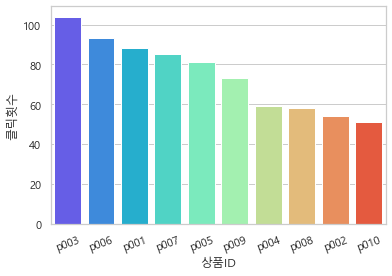

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 하나의 ipynb 노트북에서 저장한 데이터프레임을 다른 ipynb 노트북에서 이용할 때
# df.to_pickle('./data/product_log.pickle')
# plog = pd.read_pickle('../data/product_log.pickle')

df = pd.read_table('./data/product_click.log', header=None, sep=' ')
# display(df)
# print(df.dtypes)
df.columns = ['old_clicktime', 'pid']
# display(df)

# 자료형 변환
df['old_clicktime'] = df['old_clicktime'].astype('str')
df['clicktime'] = pd.to_datetime(df['old_clicktime'])
df.drop('old_clicktime', axis=1, inplace=True)

# 날짜 데이터 분리
df['yoil'] = df['clicktime'].dt.weekday
df['hour'] = df['clicktime'].dt.hour
yoil = ['월', '화', '수', '목', '금', '토', '일']
for i in range(7):
    df.loc[df['yoil']==i, 'yoil'] = yoil[i]
    
display(df)

grouped = df.groupby('pid')
number_of_pid = grouped.size() # series
number_of_pid.index=range(len(number_of_pid))

pid_series = pd.Series(list(df['pid'].unique())) # series
new_df = pd.concat([pid_series, number_of_pid], axis=1, join='outer')
new_df.columns = ['상품ID', '클릭횟수']
new_df.sort_values(by='클릭횟수', ascending=False, inplace=True)
display(new_df)

# (1) 상품별 클릭횟수 막대그래프
sns.set()
sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 깨짐 해결
barplot = sns.barplot(data=new_df, x=new_df.상품ID, y=new_df.클릭횟수, palette='rainbow')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=20)

# sns.countplot() # 알아서 개수 세서 그래프로 출력해줌
# barplot은 개수를 세어줘야함

# (2) 클릭수가 제일 많은 요일
yoil_group = df.groupby('yoil')
yoil_size = yoil_group.size() # series
print("클릭수가 제일 많은 요일은 " + yoil_size.idxmax() + "요일입니다.")

# (3) 어느 시간대에 가장 많이 클릭하는지
hour_group = df.groupby('hour')
hour_size = hour_group.size() # series
print(str(hour_size.idxmax()) + "시와 " + str(hour_size.idxmax()+1) + "시 사이에 제일 많이 클릭했습니다.")

In [2]:
import pandas as pd

df = pd.read_csv('./data/emp.csv')
# df.info() # hiredate 문자열 자료형 확인
# display(df)
df.hiredate = pd.to_datetime(df.hiredate) # datetime 자료형 변환
# df.info() # 자료형 변환 확인
display(df)

# (1) 부서별 월급의 합
deptno_group = df.groupby('deptno')
deptno_df = deptno_group['sal'].sum() # series
display(pd.DataFrame(deptno_df))

# (2) 직무(job)별 월급의 합
job_group = df.groupby('job')
job_df = job_group['sal'].sum() # series
display(pd.DataFrame(job_df))

# (3) 부서와 직무(job)별 최고 월급과 입사한지 가장 오래된 직원의 입사날짜
grouped_deptno_job = df.groupby(['deptno', 'job'])
agg_sep = grouped_deptno_job.agg({'sal':'max', 'hiredate':'min'})
display(agg_sep)

# (4) 직무(job)와 부서별 최고 월급
grouped_job_deptno = df.groupby(['job', 'deptno'])
agg_max = grouped_job_deptno.agg({'sal':'max'})
display(agg_max)

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-03,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-03-02,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-10-22,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
6,7782,CLARK,MANAGER,7839.0,1981-09-06,2450,NaN,10
7,7788,SCOTT,ANALYST,7566.0,1982-12-08,3000,NaN,20
8,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
9,7844,TURNER,SALESMAN,7698.0,1984-10-08,1500,NaN,30


,sal
deptno,
10,8750
20,10875
30,9400


,sal
job,
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


sal   hiredate
deptno job                       
10     CLERK      1300 1982-01-25
       MANAGER    2450 1981-09-06
       PRESIDENT  5000 1981-11-17
20     ANALYST    3000 1981-12-13
       CLERK      1100 1980-12-17
       MANAGER    2975 1981-03-02
30     CLERK       950 1981-12-03
       MANAGER    2850 1981-05-01
       SALESMAN   1600 1981-02-03

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600